## Analiza Danych

Aby ocenić opłacalność paneli fotowoltaicznych na podstawie Twojej ramki danych, najpierw warto zrozumieć, jakie informacje zawiera. Spójrzmy na dane, aby zobaczyć, co mamy do dyspozycji i jak możemy na tej podstawie analizować opłacalność instalacji fotowoltaicznych.

Co do wzoru na produkcję energii z paneli fotowoltaicznych, istnieje kilka podstawowych czynników wpływających na ilość generowanej energii, takich jak moc zainstalowana (w kWp), nasłonecznienie (w kWh/m²), efektywność paneli oraz liczba godzin słonecznych. Zazwyczaj wydajność instalacji fotowoltaicznej wyraża się wzorem:


E=P×H×PR
gdzie:

E jest wyprodukowaną energią elektryczną w kWh,

P oznacza moc zainstalowaną w kWp,

H jest średnim rocznym nasłonecznieniem na jednostkę powierzchni (w kWh/m²),

PR to współczynnik wydajności (Performance Ratio), który uwzględnia straty systemowe i realne warunki pracy (zwykle w przedziale 0,75 do 0,85).

Z Twoich danych wynika, że zawierają one informacje o temperaturze, uczuciu temperatury, minimalnej i maksymalnej temperaturze, ciśnieniu, wilgotności, prędkości wiatru, zachmurzeniu i głównych warunkach pogodowych dla różnych miast i dni. Kluczowe kolumny to:

date: data pomiaru,
city_name: nazwa miasta,
temp: średnia temperatura,
feels_like: temperatura odczuwalna,
temp_min i temp_max: minimalna i maksymalna temperatura,
pressure: ciśnienie,
humidity: wilgotność,
wind_speed: prędkość wiatru,
clouds_all: poziom zachmurzenia,
weather_main: główne warunki pogodowe.

Aby analizować opłacalność paneli fotowoltaicznych, przydałaby się informacja o nasłonecznieniu, które jest kluczowe do obliczenia potencjalnej produkcji energii. W Twojej ramce danych nie ma bezpośrednich informacji o nasłonecznieniu ani o mocy zainstalowanych paneli fotowoltaicznyc

**Oszacowanie nasłonecznienia**
Clouds_all: Kolumna ta pokazuje stopień zachmurzenia w procentach. Można przyjąć, że dni z mniejszym zachmurzeniem (np. poniżej 20-30%) są bardziej nasłonecznione.
Weather_main: Ta kolumna wskazuje główne warunki pogodowe, takie jak "Clear", "Clouds", "Rain", itp. Dni z "Clear" można uznać za pełne nasłonecznienie, podczas gdy "Clouds" mogą być traktowane jako częściowo nasłonecznione w zależności od stopnia zachmurzenia.

**Wpływ temperatury**
Temperatura, zwłaszcza temp_max, może mieć wpływ na efektywność paneli fotowoltaicznych. Zwykle panele fotowoltaiczne są najbardziej efektywne w umiarkowanych temperaturach, a ich wydajność spada zarówno w bardzo wysokich, jak i bardzo niskich temperaturach. Można uwzględnić temperaturę w analizie, choć jej wpływ na ogólną wydajność paneli jest mniej bezpośredni niż nasłonecznienie.

**Proponowane obliczenia**
Mogę pomóc stworzyć prosty model oszacowania dni nasłonecznionych na podstawie danych clouds_all i weather_main, a następnie użyć tego oszacowania, by przybliżyć potencjalną produkcję energii, jeśli podasz przykładową moc zainstalowaną dla paneli. Czy chciałbyś, żebym przeprowadził taką analizę na Twoich danych? Jeśli tak, proszę podaj moc zainstalowaną, którą chciałbyś użyć w obliczeniach.

In [1]:
import pandas as pd
from sqlalchemy import create_engine, text

In [2]:
# Wczytanie danych z bazy danych.

# Ścieżka do pliku bazy danych SQLite
sqlite_db_path = r'../5. Baza_Danych/projekt_fotowoltaika_2024.db'

In [3]:
# Tworzenie połączenia z bazą danych
engine = create_engine(f'sqlite:///{sqlite_db_path}')

In [4]:
# Zapytanie o listę tabel w bazie danych
with engine.connect() as con:
    tables_list = con.execute(text("SELECT name FROM sqlite_master WHERE type='table';")).fetchall()
    print('Lista tabel:', tables_list)

Lista tabel: [('projekt_fotowoltaika_2024',)]


In [5]:
# Wczytanie danych do DataFrame.
with engine.connect() as con:
    query = text("SELECT * FROM projekt_fotowoltaika_2024;")
    df_weather_db = pd.read_sql(query, con)

In [6]:
df_weather_db.head()

,Unnamed: 0,date,city_name,lat,lon,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_main
0,0,1979-01-01,Baden_Baden,48.765640,8.228524,-10.442083,-16.532917,-16.18,3.02,1013.666667,81.916667,3.681667,100,Snow
1,1,1979-01-01,Bozanska,54.473028,18.302179,-14.100000,-20.617500,-19.14,-9.46,1002.416667,82.000000,6.157917,100,Snow
2,2,1979-01-01,Walcz_Drugi,53.257039,16.521203,-16.437083,-23.322500,-21.26,-9.57,1003.708333,82.416667,3.682083,100,Clouds
3,3,1979-01-02,Baden_Baden,48.765640,8.228524,-8.856667,-14.874167,-15.82,-3.96,1024.250000,84.208333,4.524583,100,Snow
4,4,1979-01-02,Bozanska,54.473028,18.302179,-9.037917,-15.179167,-14.14,-7.40,1004.791667,85.375000,4.449583,100,Clouds


In [7]:
# Usunięcie kolumny 'Unnamed: 0'
df_weather_db.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
#Ustawienie kolumny "data" jako index
#df_weather_db.set_index('date', inplace=True)

In [9]:
df_weather_db.head()

,date,city_name,lat,lon,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_main
0,1979-01-01,Baden_Baden,48.765640,8.228524,-10.442083,-16.532917,-16.18,3.02,1013.666667,81.916667,3.681667,100,Snow
1,1979-01-01,Bozanska,54.473028,18.302179,-14.100000,-20.617500,-19.14,-9.46,1002.416667,82.000000,6.157917,100,Snow
2,1979-01-01,Walcz_Drugi,53.257039,16.521203,-16.437083,-23.322500,-21.26,-9.57,1003.708333,82.416667,3.682083,100,Clouds
3,1979-01-02,Baden_Baden,48.765640,8.228524,-8.856667,-14.874167,-15.82,-3.96,1024.250000,84.208333,4.524583,100,Snow
4,1979-01-02,Bozanska,54.473028,18.302179,-9.037917,-15.179167,-14.14,-7.40,1004.791667,85.375000,4.449583,100,Clouds


C:\Users\reszbart\AppData\Local\Temp/ipykernel_24704/1055016808.py:17: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


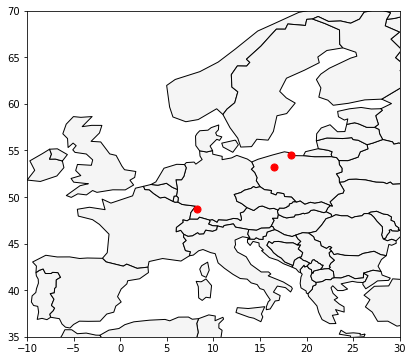

In [14]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Przykładowe dane, jeśli masz już szerokość i długość geograficzną:
data = {
    'City': ['Baden_Baden', 'Bozanska', 'Walcz_Drugi'],
    'Latitude': [48.765640, 54.473028, 53.257039],
    'Longitude': [8.228524, 18.302179, 16.521203]
}
df = pd.DataFrame(data)

# Konwersja danych DataFrame na GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

# Tworzenie mapy i skupienie na Europie
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Definiowanie granic dla mapy Europy
ax = world.plot(figsize=(10, 6), color='whitesmoke', edgecolor='black', linewidth=1)
gdf.plot(ax=ax, color='red', markersize=50)

# Ustawienie zakresu dla Europy
ax.set_xlim(-10, 30)  # Długość geograficzna od -10 do 30
ax.set_ylim(35, 70)  # Szerokość geograficzna od 35 do 70

plt.show()



moze tutaj zrobimy jeszcze raz wstepne sprawdzenia danych, jakie typy sa, ile jest pustych wartosci itp

tutaj moze jakies wstepne wykresy pokazujace zeby zobaczyc dane jak sie ksztaltowalo to:
- miejsce na mapie
- jak ksztaltuje sie pogoda na przestrzeni lat (temp, wiatr szybkosc, zachmurzenie, weather main)
- na podstawie tych danych mopodejmujemy kroki nizej, czyli zakaldamy prosta hipoteze na potrzeby proejktu zeby obliczyc oplacalnosc potrzebujemy naslonecznienia oraz temperatury
- uzupelniamy ramke tymi danymi, wyswietlamy wykresy dla nich.
- z przygotowanymi danymi mozemy przygotowac wizualizacje i dashboard 1 dla wartosci hsitorycznych (dashboard 2 bedzie predykcja)

Jeśli planujesz prezentację, która kompleksowo ilustruje wpływ różnych czynników na produkcję energii, lepiej podejść do tego zadania w sposób holistyczny od samego początku. Możemy połączyć analizę wpływu dni nasłonecznionych oraz temperatury na produkcję energii, uwzględniając oba te czynniki jednocześnie w obliczeniach. Dzięki temu uzyskasz bardziej precyzyjne i zintegrowane wyniki, które będą lepiej oddawały rzeczywiste warunki pracy paneli fotowoltaicznych.

Proponowane kroki:
Obliczenie potencjalnej produkcji energii dla każdej lokalizacji i każdego miesiąca, uwzględniając liczby dni nasłonecznionych oraz temperatury.
Korekta produkcji energii na podstawie temperatury: Wyższe temperatury mogą obniżać wydajność paneli, szczególnie w bardzo ciepłe dni. Ustalimy funkcję korekty wydajności na podstawie temperatury.

In [10]:
# Krok 1: Oszacowanie dni nasłonecznionych

# Ustalamy kryteria dla dni nasłonecznionych
data['sunny_day'] = (data['clouds_all'] < 30) | (data['weather_main'] == 'Clear')

# Krok 2: Obliczanie przybliżonej produkcji energii dla przykładowej mocy instalacji 5 kWp

# Definiujemy stałe
installed_power_kWp = 5  # Moc zainstalowana w kWp
performance_ratio = 0.75  # Performance Ratio (współczynnik wydajności)
average_daily_sun_hours = 4  # Średnia liczba godzin słonecznych na dobę (ogólna wartość dla przykładu)

# Obliczamy roczną produkcję energii
# Liczba dni nasłonecznionych w roku
annual_sunny_days = data.groupby(data['date'].str[:4])['sunny_day'].sum()

# Roczna produkcja energii w kWh
annual_energy_production_kWh = annual_sunny_days * installed_power_kWp * average_daily_sun_hours * performance_ratio

# Przykładowe wyniki dla kilku lat
annual_energy_production_kWh.head()


NameError: name 'data' is not defined

In [ ]:
# Krok 1: Obliczenie miesięcznej produkcji energii z uwzględnieniem dni nasłonecznionych

# Obliczmy średnią temperaturę maksymalną w każdym miesiącu dla każdej lokalizacji
monthly_avg_max_temp = data.groupby(['city_name', 'year_month'])['temp_max'].mean().reset_index()

# Połączmy dane o dniach nasłonecznionych z danymi o temperaturze
monthly_data = monthly_sunny_days.merge(monthly_avg_max_temp, on=['city_name', 'year_month'])

# Definicja funkcji korekty wydajności na podstawie temperatury
def performance_correction(temp):
    # Przyjmujemy spadek wydajności o 0.5% na każdy stopień powyżej 25 stopni C
    if temp > 25:
        return 1 - (0.005 * (temp - 25))
    else:
        return 1

# Obliczamy miesięczną produkcję energii z korektą temperatury
monthly_data['performance_factor'] = monthly_data['temp_max'].apply(performance_correction)
monthly_data['monthly_energy_production_kWh'] = (
    monthly_data['sunny_day'] * installed_power_kWp * average_daily_sun_hours * performance_ratio *
    monthly_data['performance_factor']
)

# Pokażemy przykładowe wyniki
monthly_data[['city_name', 'year_month', 'sunny_day', 'temp_max', 'monthly_energy_production_kWh']].head()
